### Importing environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Simulating Income
Assume that all of you will graduate from MACSS in June 2019, and you annual income is generated by the follwoing process:

$$
\begin{array}{c}
ln(inc_{2019}) = ln(inc_0) + ln(\epsilon_{2019}) \\
ln(inc_t) = (1 - \rho) [ln(inc_0) + g(t - 2019)] + \rho ln(inc_{t-1}) + ln(\epsilon_t) \  for \ 2020 < t < 2058
\end{array}
$$

where the variable $inc_{t}$ is your annual income in year $t \ge 2019$, $inc_{0}$ is the average starting income, $\rho$ reflets some positive dependence of today's income on last period's income, g is the annual growth rate for annual salary. And  $ln(\epsilon_t)$  is distributed $N(0, \sigma)$.

## Question1 
Let the standard deviation be $\sigma = 0.1$, let the persistence be $\rho = 0.2$, let the growth be g = 0.03, and let initial income be $inc_0 = \$ 80,000.$  Assume work for 40 years after graduate (2019 to 2058). Simulate 10,000 different realization of your lifetime income. Do this by first drawing 10,000 sets of normally distributed error with mean 0 and sd = 0.1. Then plug those into the income process defined above to simulate your life time inomce. Plot one of the lifetime income path. Make sure 
your axes are correctly labeled and your plot has a title.

### Model Setup

In [2]:
np.random.seed(388)

def inc_2019(inc_0, rands):
    return math.exp(math.log(inc_0) + rands[0])
    
def inc_t(mu, rho, inc_0, growth, t, inc_t1, rands):
    first_part = (1 - rho) * (math.log(inc_0) + growth * t)
    second_part = rho * math.log(inc_t1) + rands[t]
    return math.exp(first_part + second_part)

def main_simulation(mu, sigma, length, inc_0, rho, growth, num_rep):
    incomes = np.zeros((length, num_rep))
    for rep in range(num_rep):
        # Draw the random variables
        rands = np.random.normal(mu, sigma, length)
        # start of the repetition
        incomes[0,rep] = inc_2019(inc_0, rands)
        for dummy in range(length - 1):
            incomes[dummy + 1, rep] = inc_t(mu, rho, inc_0, growth, dummy + 1,incomes[dummy, rep], rands)
    return incomes

def draw_life_time(incomes):
    # plot randomly choosed one of the realization of life time income
    choice = np.random.randint(0, len(incomes))
    x = range(2019, 2059)
    y = incomes[:,choice]
    plt.plot(x, y)
    plt.title('One Realization of the Life Time Income')
    plt.xlabel(r'Year $t$')
    plt.ylabel(r'Annual Income ($)')
    plt.show()

## Realization

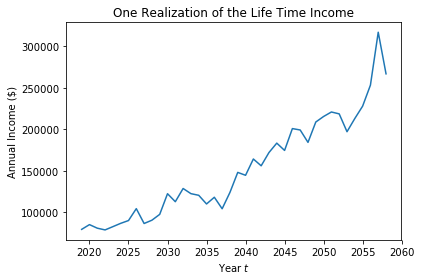

In [3]:
mu, sigma, length, inc_0, rho, growth, num_rep = 0, 0.1, 40, 80000, 0.2, 0.03, 10000
incomes = main_simulation(mu, sigma, length, inc_0, rho, growth, num_rep)
draw_life_time(incomes)

## Question 2
Plot a histogram with 50 bins of year t = 2019 initial income for each of the 10,000 simulations. What percent of your class will earn more than $\$70,000$ ? Is the distribution normally distributed?

We will start from plotting the histogram of the 10,000 realization of income simulation

1.25 pecent of the class will earn more than $100,000
9.67 pecent of the class will earn less than $70,000


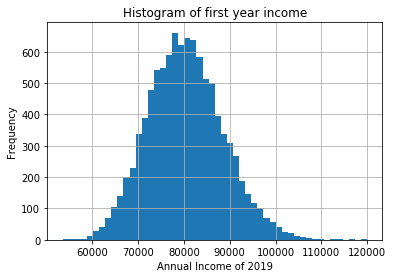

In [4]:
def main(incomes):        
    # plot the histogram of the 10,000 simulations    
    income2019 = incomes[0,:]
    # count the percentage
    large = 0
    small = 0
    for income in income2019:
        if income >= 100000:
            large += 1
        if income <= 70000:
            small += 1
    
    # print the count results
    print('{} pecent of the class will earn more than $100,000'.format(large/100))
    print('{} pecent of the class will earn less than $70,000'.format(small/100))
        
    # plot the histogram
    fig, ax = plt.subplots()
    plt.hist(income2019, bins=50)
    plt.title('Histogram of first year income')
    plt.xlabel('Annual Income of 2019')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

main(incomes)

In my oppinion it looks like a normal distribution, it is symmetric around 80,000 and bell curved.

## Question 3 
Suppose you graduate from the MACSS program with \$ 95,000 of zero interest debt. You will use 10 $\%$ of your ananual salary after you graduate to pay off this loan. Plot the histogram of how many years it takes to pay off the loan in each of your 10,000 simulations. The histogram will only have as many as bins as you have unique years in which people pay off their debt. In what percent of the simulation are you able to pay off the loan in 10 years(on or before t = 2028)?

We will take the simulation results of the incomes from the pervious question and calculate the debt payoff matrix.

### Model Settup


In [5]:
def debt_results(incomes, ini_debt):
    # set up the repetition environment
    results = []
    for rep in range(len(incomes[0])):
        # set up the initial environment for each repetition
        debt = ini_debt
        # start repetition
        debt  -= 0.1 * incomes[0, rep]
        for dummy in range(length - 1):
            if debt <= 0:
                results.append(dummy + 1)
                break
            else:
                debt -= 0.1 * incomes[dummy + 1, rep]
    return results
    
def draw_pay_histogram(results):
    # count the percentage
    intime = 0
    for year in results:
        if year <= 10:
            intime += 1
    print('{} pecent of the class are able to pay off the loan in 10 years.'.format(intime/100))
    # plot a histogram of the 10,000 simulation
    plt.hist(results, 
             bins = np.arange(min(results), max(results) + 2, 1))
    plt.title('Histogram of years needed to pay debt')
    plt.xlabel('Years to Pay back all Debt')
    plt.ylabel('Frequncy')
    plt.show()

### Realization

17.97 pecent of the class are able to pay off the loan in 10 years.


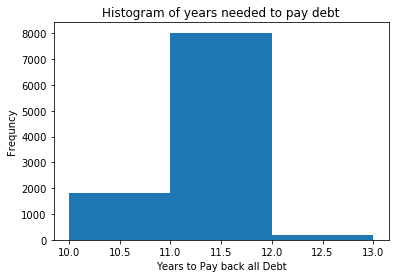

In [6]:
ini_debt = 95000
results3 = debt_results(incomes, ini_debt)        
draw_pay_histogram(results3)

## Question 4
Suppose now the program becomes very well known in the nexy year, and the skills you are learning are demanded more by employers. This increases the average starting salary to $inc_0 = \$ 85,00$, but the standard deviation in incomes increases also to $\sigma$ = 0.15. Plot new histogram of how many years it takes to pay off your loan. In what percent of the simulations are you able to pay off the loan in 10 years?

### Realization Under New Constants

69.78 pecent of the class are able to pay off the loan in 10 years.


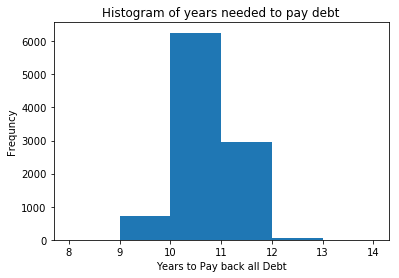

In [7]:
sigma_new, inc_0_new = 0.15, 85000
incomes4 = main_simulation(mu, sigma_new, length, inc_0_new, rho, growth, num_rep)
results4 = debt_results(incomes4, ini_debt)        
draw_pay_histogram(results4)